In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date

In [2]:
sectors = ['SPY', 'QQQ', 'GLD', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
volatility = ['VIXY', 'VIXM', 'SVOL'] #SHORTVOL and LONGVOL?
sectors = sectors + volatility

In [3]:
df_list= [pd.read_csv('data/' + sector + '.csv') for sector in sectors]
df_sector_vwap = pd.DataFrame([df_list[i]['vwap'] for i in range(len(df_list))])
df_sector_vwap = df_sector_vwap.T
df_sector_vwap.columns = sectors

df_sector_vwap.index = pd.to_datetime(df_list[0]['timestamp'], unit='ms')
df_sector_vwap.index = pd.to_datetime(df_sector_vwap.index.date)

In [4]:
today = str(datetime.now())
SPY_today = 559.15
QQQ_today = 497.07
VIXY_today = 10.14
VIXM_today = 14.015

current_value = { 'SPY' : {today : SPY_today}, 'QQQ' : {today : QQQ_today}, 'VIXY' : {today : VIXY_today}, 'VIXM' : {today : VIXM_today}}

index_vwap = df_sector_vwap[['SPY', 'QQQ', 'VIXY', 'VIXM']]
index_vwap = pd.concat([index_vwap, pd.DataFrame(current_value)])
index_vwap.index = pd.to_datetime(index_vwap.index)
index_vwap.index = index_vwap.index.date
index_vwap

,SPY,QQQ,VIXY,VIXM
2022-07-12,382.6181,288.1903,86.9315,34.9742
2022-07-13,378.8276,284.7785,87.6520,35.1760
2022-07-14,375.5832,283.7290,88.8355,35.6423
2022-07-15,383.3245,290.1673,83.3205,34.7001
2022-07-18,385.0910,292.3642,83.5295,34.8179
...,...,...,...,...
2024-07-05,553.5662,494.8482,10.3753,14.0875
2024-07-08,555.1683,496.6562,10.1904,14.0161
2024-07-09,556.1021,498.0287,10.2004,13.9937
2024-07-10,559.4119,501.2089,10.1280,13.9195


In [5]:
import talib as ta
import matplotlib.pyplot as plt

In [6]:
sector_ema = pd.DataFrame()
index_ema_today = pd.DataFrame()
sector_sma = pd.DataFrame()
index_sma_today = pd.DataFrame()
bbands = pd.DataFrame()

In [7]:
for col in df_sector_vwap.columns:
    sector_ema[col] = ta.EMA(df_sector_vwap[col], timeperiod=20)
    sector_sma[col] = ta.SMA(df_sector_vwap[col], timeperiod=20)

for col in index_vwap.columns:
    index_ema_today[col] = ta.EMA(index_vwap[col], timeperiod=20)
    index_sma_today[col] = ta.SMA(index_vwap[col], timeperiod=20)

for col in df_sector_vwap.columns:
    bbands[col + 'upper'], bbands[col + 'mid'], bbands[col + 'lower'] = ta.BBANDS(df_sector_vwap[col], timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)

In [8]:
sector_df = pd.DataFrame()
index_df_today = pd.DataFrame()

In [9]:
sector_diff = ((sector_ema - sector_sma)/sector_sma) * 10000
index_diff_today = ((index_ema_today - index_sma_today)/index_sma_today) * 10000

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03,-11.178077,-13.924426,16.453452,-10.585568,36.232405,-28.626608,66.543748,18.843593,-35.034425,-0.656524,-21.257936,-23.907921,-17.425805,-32.426538,9.257665,6.737077,-14.092159
2024-07-05,-9.895116,-11.461144,30.700564,0.494537,39.570016,-24.506940,57.912437,20.707770,-39.281894,-3.345681,-20.292728,-22.324877,-21.264696,-21.080675,0.425095,-5.460304,-12.142055
2024-07-08,-7.602093,-8.093369,42.764100,11.282230,45.532651,-15.868056,48.591657,23.960121,-38.566186,-4.400387,-14.182801,-18.830696,-24.649536,-12.928615,-16.021288,-15.977271,-8.678038
2024-07-09,-6.488303,-7.226557,39.817953,18.495758,50.269890,-9.138277,38.945575,32.046140,-35.460747,-4.803956,-13.444894,-20.015270,-30.631657,-6.597159,-32.809087,-27.873080,-5.370380


In [10]:
sector_diff = sector_diff.dropna()
index_diff_today = index_diff_today.dropna()

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-08-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-08-09,-3.600008,-6.827082,11.795340,-3.953252,-16.909008,1.685264,-12.188842,2.469006,1.533879,1.201723,-0.158701,3.809575,-9.635163,16.214644,9.670408,7.176450,-3.677978
2022-08-10,-7.227534,-12.301058,21.817272,-1.515857,-26.420438,1.938584,-24.907473,4.509550,-2.055510,0.050172,2.495172,5.974700,-17.444077,26.111990,11.785551,9.349215,-1.961929
2022-08-11,-15.330846,-21.953733,20.576764,-6.076154,-44.180782,-1.373799,-39.847110,-3.265911,-12.781775,-9.160389,-5.335992,-0.860063,-28.546306,29.969751,32.536410,20.525410,-4.122059
2022-08-12,-15.116156,-24.598186,18.150801,0.163970,-52.870665,-1.333124,-47.023825,2.990201,-9.748605,-11.878895,-6.350585,-2.109763,-29.519726,34.600117,19.570394,16.565636,0.014082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-03,-11.178077,-13.924426,16.453452,-10.585568,36.232405,-28.626608,66.543748,18.843593,-35.034425,-0.656524,-21.257936,-23.907921,-17.425805,-32.426538,9.257665,6.737077,-14.092159
2024-07-05,-9.895116,-11.461144,30.700564,0.494537,39.570016,-24.506940,57.912437,20.707770,-39.281894,-3.345681,-20.292728,-22.324877,-21.264696,-21.080675,0.425095,-5.460304,-12.142055
2024-07-08,-7.602093,-8.093369,42.764100,11.282230,45.532651,-15.868056,48.591657,23.960121,-38.566186,-4.400387,-14.182801,-18.830696,-24.649536,-12.928615,-16.021288,-15.977271,-8.678038
2024-07-09,-6.488303,-7.226557,39.817953,18.495758,50.269890,-9.138277,38.945575,32.046140,-35.460747,-4.803956,-13.444894,-20.015270,-30.631657,-6.597159,-32.809087,-27.873080,-5.370380


In [11]:
sector_diff.info()
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483 entries, 2022-08-08 to 2024-07-10
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     483 non-null    float64
 1   QQQ     483 non-null    float64
 2   GLD     483 non-null    float64
 3   XLC     483 non-null    float64
 4   XLY     483 non-null    float64
 5   XLP     483 non-null    float64
 6   XLE     483 non-null    float64
 7   XLF     483 non-null    float64
 8   XLV     483 non-null    float64
 9   XLI     483 non-null    float64
 10  XLB     483 non-null    float64
 11  XLRE    483 non-null    float64
 12  XLK     483 non-null    float64
 13  XLU     483 non-null    float64
 14  VIXY    483 non-null    float64
 15  VIXM    483 non-null    float64
 16  SVOL    483 non-null    float64
dtypes: float64(17)
memory usage: 67.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2022-08-08 to 2024-07-11
Data columns (total 4 columns):
 #   Column  Non

In [12]:
#Rate of change of the sector_diff

sector_diff_delta = pd.DataFrame()
sector_diff_delta['delta'] = (sector_diff.iloc[-1] - sector_diff.iloc[-3]) / abs(sector_diff.iloc[-3])
#sector_diff_delta['delta2'] = sector_diff.apply(ta.ROCP, timeperiod=2)
sector_diff_delta_disp = sector_diff_delta.sort_values('delta', axis=0, ascending=False)

index_diff_delta = pd.DataFrame()
index_diff_delta['delta'] = (index_diff_today.iloc[-1] - index_diff_today.iloc[-3]) / abs(index_diff_today.iloc[-3])
#index_diff_delta['delta2'] = index_diff_delta.apply(ta.ROCP, timeperiod=2)
index_diff_delta_disp = index_diff_delta.sort_values('delta', axis=0, ascending=False)

print(sector_diff_delta_disp)
print(index_diff_delta_disp)
#sector_diff_delta['delta_func'] = ta.ROCR100(sector_diff.values, timeperiod=3)



         delta
XLU   1.332940
XLC   1.028625
SVOL  0.761627
XLP   0.695105
XLF   0.477592
SPY   0.415724
XLB   0.266207
XLV   0.231662
QQQ   0.215583
XLY   0.145284
XLI   0.080380
XLRE  0.065521
GLD  -0.075958
XLE  -0.328817
XLK  -0.424630
VIXM -1.502285
VIXY -1.886865
         delta
SPY   0.310714
VIXY -0.556032
QQQ  -0.570203
VIXM -0.631798


In [13]:
sector_diff_delta = sector_diff.pct_change(2)
index_diff_today_delta = index_diff_today.pct_change(2)
sector_diff_accel = sector_diff_delta.pct_change(2)
index_diff_today_accel = index_diff_today_delta.pct_change(2)
index_diff_today_accel2 = index_diff_today_delta.pct_change(3)
index_diff_today_accel3 = index_diff_today_delta.pct_change(4
                                                            )

In [14]:
#How to concat the last row of each df ---

sector_snapshot = pd.concat([sector_diff.iloc[-1], sector_diff_delta.iloc[-1], sector_diff_accel.iloc[-1]], axis=1)
sector_snapshot.columns = ['diff', 'delta', 'accel']
sector_snapshot

index_snapshot = pd.concat([index_diff_today.iloc[-1], index_diff_today_delta.iloc[-1], index_diff_today_accel.iloc[-1], index_diff_today_accel2.iloc[-1], index_diff_today_accel3.iloc[-1]], axis=1)
index_snapshot.columns = ['diff', 'delta', 'accel', 'accel2', 'accel3']

index_snapshot.sort_values('diff', ascending=False)

#This one is pretty legit

,diff,delta,accel,accel2,accel3
SPY,-4.472295,-0.310714,-0.097528,-0.028747,-1.540184
QQQ,-11.347159,0.570203,-2.543285,-2.361630,-0.447032
VIXM,-45.483246,0.631798,-0.846078,-1.187391,-1.483635
VIXY,-51.051985,0.556032,-1.007112,-1.203630,-1.573035


How do we get the value that would keep the security above

In [15]:
sector_diff_sorted = sector_diff.iloc[-1].T.sort_values(axis=0, ascending=False)
index_diff_sorted = index_diff_today.iloc[-1].T.sort_values(axis=0, ascending=False)

print(sector_diff_sorted)
print(index_diff_sorted)

sector_diff_delta_disp.assign(diff = sector_diff_sorted).sort_values('diff', axis=0, ascending=False)

XLY     52.147805
GLD     39.515830
XLF     35.403284
XLE     32.613877
XLC     22.887414
XLU      4.304456
SVOL    -2.068614
XLI     -4.046685
SPY     -4.441722
XLP     -4.838098
QQQ     -6.348574
XLB    -10.407243
XLRE   -17.596897
XLV    -29.631878
XLK    -35.116472
VIXM   -39.979688
VIXY   -46.251293
Name: 2024-07-10 00:00:00, dtype: float64
SPY     -4.472295
QQQ    -11.347159
VIXM   -45.483246
VIXY   -51.051985
Name: 2024-07-11, dtype: float64


,delta,diff
XLY,0.145284,52.147805
GLD,-0.075958,39.515830
XLF,0.477592,35.403284
XLE,-0.328817,32.613877
XLC,1.028625,22.887414
XLU,1.332940,4.304456
SVOL,0.761627,-2.068614
XLI,0.080380,-4.046685
SPY,0.415724,-4.441722
XLP,0.695105,-4.838098


In [16]:
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2022-08-08 to 2024-07-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     484 non-null    float64
 1   QQQ     484 non-null    float64
 2   VIXY    484 non-null    float64
 3   VIXM    484 non-null    float64
dtypes: float64(4)
memory usage: 18.9+ KB


In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

In [ ]:
px.line(data_frame=sector_diff).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
px.line(data_frame=df_sector_vwap['SPY'].loc['2022-02-15 04:00:00':])

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
fig = go.Figure(
    make_subplots(rows=3, cols=1, shared_xaxes='all')
)
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index), row=1, col=1)

In [ ]:
df = pd.read_csv('data/QQQ.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
#fig.add_trace(name='raw', x=)
fig.add_hline(0)
fig.add_trace(go.Scatter(x=df.index, y=df['vwap']), row=2, col=1)
fig.add_trace(go.Scatter(x=sector_diff.index, y=sector_diff['QQQ']), row=3, col=1)
fig.show()

C:\Users\quack\AppData\Local\Temp\ipykernel_12760\3875102436.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
import scipy.stats as stats

In [ ]:
zscore = lambda x: (x[-1] - x.mean()) / x.std()
sector_diff_z = sector_diff.rolling(30).apply(zscore).rolling(5).mean()

C:\Users\quack\AppData\Local\Temp\ipykernel_12760\716367803.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
px.line(data_frame=sector_diff_z['2022-03-04':][['SPY', 'QQQ']]).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
sectors = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
condensed_df = pd.DataFrame()
condensed_df['volatility'] = (sector_diff['VIXY'] + sector_diff['VIXM']) / 2
condensed_df['sector_avg'] = sum([sector_diff[sector] for sector in sectors]) / len(sectors)
condensed_df['long_bonds'] = sector_diff['TLT']
condensed_df['metals'] = sector_diff['GLD']

KeyError: 'TLT'

In [ ]:
px.line(data_frame=condensed_df).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import seaborn as sns

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

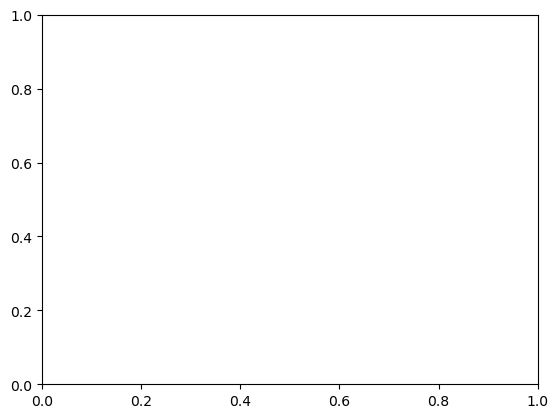

In [ ]:
sns.kdeplot(data=condensed_df)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

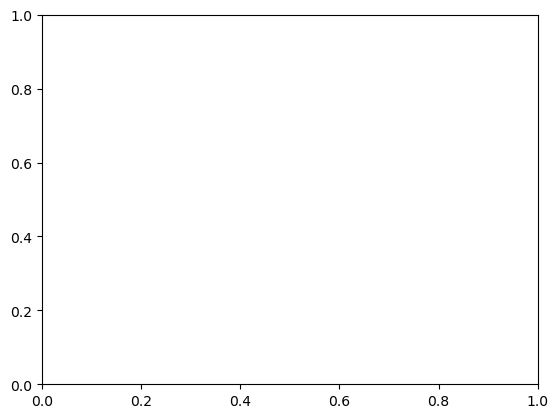

In [ ]:
sns.kdeplot(data=sector_diff)

In [ ]:
#Divide by abs of z score?

In [ ]:
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index))